In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose, STL

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/marcopeix/AppliedTimeSeriesAnalysisWithPython/main/data/jj.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [3]:
df['year'] = pd.DatetimeIndex(df['date']).year
df.head()

,date,data,year
0,1960-01-01,0.71,1960
1,1960-04-01,0.63,1960
2,1960-07-02,0.85,1960
3,1960-10-01,0.44,1960
4,1961-01-01,0.61,1961


A time series is a set of data points ordered in time.

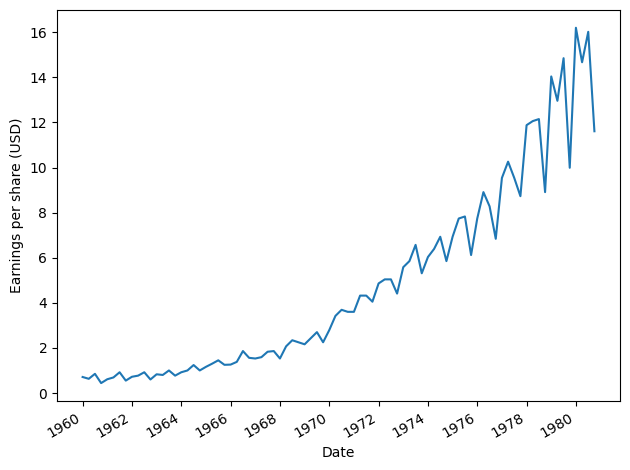

In [5]:
fig, ax = plt.subplots()

ax.plot(df.date, df.data)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()


### Components of time series

We can further our understanding of time series by looking at their three components: a trend, a seasonal component, and residuals. In fact, all time series can be decomposed into these three elements

Decomposition is defined as a statistical task that separates a time series into its different components. We can visualize each individual component, which will help us identify the trend and seasonal pattern in the data, which is not always straightforward just by looking at a dataset.

In [6]:
advanced_decomposition = STL(df.data, period=4).fit()

The trend is defined as the slow-moving changes in a time series.

The seasonal component captures the seasonal variation, which is a cycle that occurs over a fixed period of time. Therefore, we can say that the seasonal component shows how we deviate from the trend. Sometimes we have a positive deviation, and we get a peak in the Observed graph. Other times, we have a negative deviation, and we see a trough in Observed.

The residuals, which is what cannot be explained by either the trend or the seasonal components. We can think of the residuals as adding the Trend and Seasonal graphs together and comparing the value at each point in time to the Observed graph. the Residuals graph shows what value must be added to Trend and Seasonal in order to adjust the result and get the same value as in Observed. Residuals usually correspond to random errors, also termed white noise

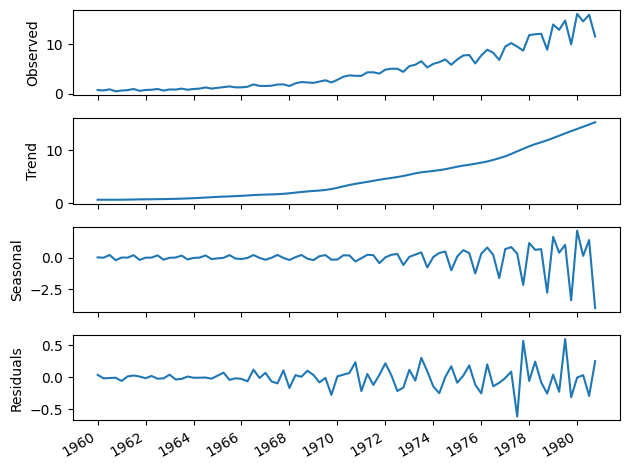

In [11]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

Forecasting is predicting the future using historical data and knowledge of future events that might affect our forecasts. 

If you observe seasonality, then a SARIMA model would be relevant, because this model uses seasonal effects to produce forecasts. If you have information on wind speed and humidity, you could take that into account using the SARIMAX model, because you can feed it with information from exogenous variables, such as wind speed and humidity.

since your horizon is one week, you can remove the last seven data points from your training set to place them in a test set. Then, when each model is trained, you can produce one-week forecasts and compare the results to the test set. The model’s performance can be assessed by computing an error metric, such as the mean squared error (MSE).

The first concept to keep in mind is that time series have an order, and we cannot change that order when modeling. In time series forecasting, we express future values as a function of past values. Therefore, we must keep the data in order, so as to not violate this relationship.

time series are indexed by time, and that order must be kept. Otherwise, you would be training your model with future information that it would not have at prediction time. This is called look-ahead bias in more formal terms